형태소 분석 Mecab + 워드클라우드 WordCloud

Mecab 코드 참고 : https://sanghyu.tistory.com/170
WordCloud 코드 참고 : https://m.blog.naver.com/nilsine11202/221834254905

In [5]:
import os 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

df=pd.read_csv('/content/danawa3_label.csv',encoding='CP949')
del df['Unnamed: 0']
df

In [99]:
df['label'].value_counts()

1    1572
0     628
Name: label, dtype: int64

In [100]:
good_text=[]
bad_text=[]

for i in range(len(df)):
    if df.loc[i,'label']==1:
        good_text.append(df.loc[i,'text'])
    else:
        bad_text.append(df.loc[i,'text'])

In [101]:
good_text = [x for x in good_text if pd.isnull(x) == False]
bad_text = [x for x in bad_text if pd.isnull(x) == False]

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
cd Mecab-ko-for-Google-Colab/

In [ ]:
!bash ./install_mecab-ko_on_colab190912.sh

In [4]:
from konlpy.tag import Mecab
mecab = Mecab()

In [102]:
good_morphs = []
bad_morphs = []

for i in range(len(good_text)):
    try:
        good_morphs.append(mecab.pos(good_text[i]))
    except UnicodeDecodeError:
        pass

for i in range(len(bad_text)):
    try:
        bad_morphs.append(mecab.pos(bad_text[i]))
    except UnicodeDecodeError:
        pass

In [103]:
good_list=[] 
bad_list=[] 

for sentence in good_morphs : 
    for word, tag in sentence : 
        if tag in ['NNP',"NNG","NA","VA","NNB","VA","MM","IC","MA","VCP"] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word)and("좋"not in word):
            good_list.append(word)

for sentence in bad_morphs : 
    for word, tag in sentence : 
        if tag in ['NNP',"NNG","NA","VA","NNB","VA","MM","IC","MA","VCN"] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word)and("좋"not in word):
            bad_list.append(word)

In [104]:
from collections import Counter

good_count = Counter(good_list)
good_word = dict(good_count.most_common())

bad_count = Counter(bad_list)
bad_word = dict(bad_count.most_common())

In [31]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

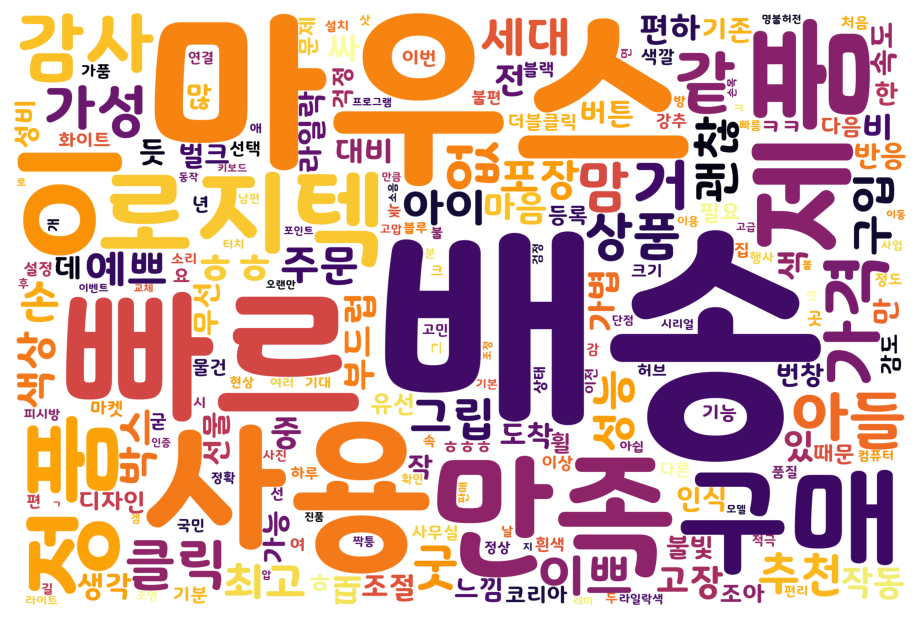

In [81]:
wordcloud = WordCloud(min_word_length=10,
font_path = '/content/Binggrae_0.ttf', background_color='white',
colormap = "inferno", width=3000, height=2000).generate_from_frequencies(good_word)
plt.imshow(wordcloud) 

figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()

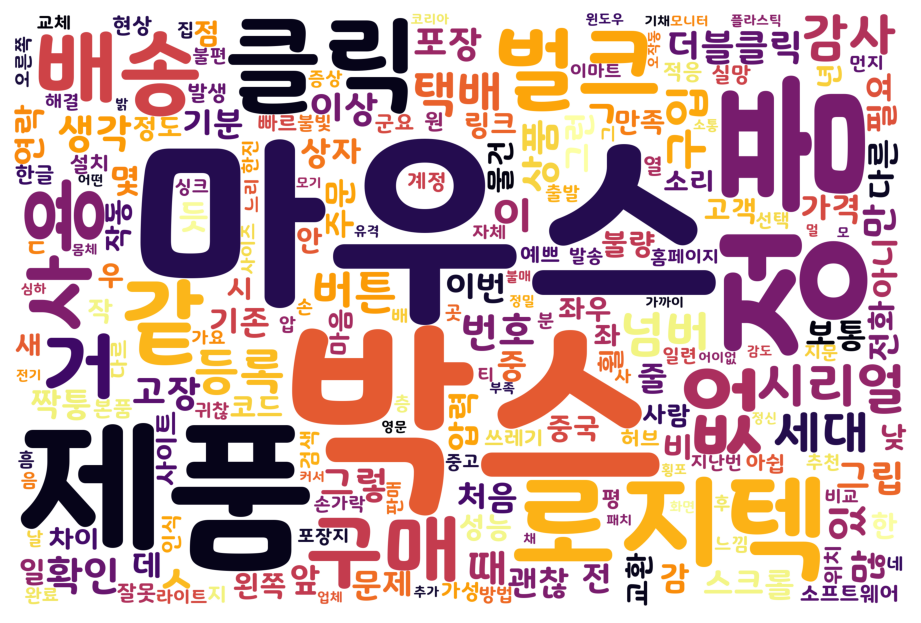

In [82]:
wordcloud = WordCloud(min_word_length=10,
font_path = '/content/Binggrae_0.ttf', background_color='white',
colormap = "inferno", width=3000, height=2000).generate_from_frequencies(bad_word)
plt.imshow(wordcloud) 

figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()

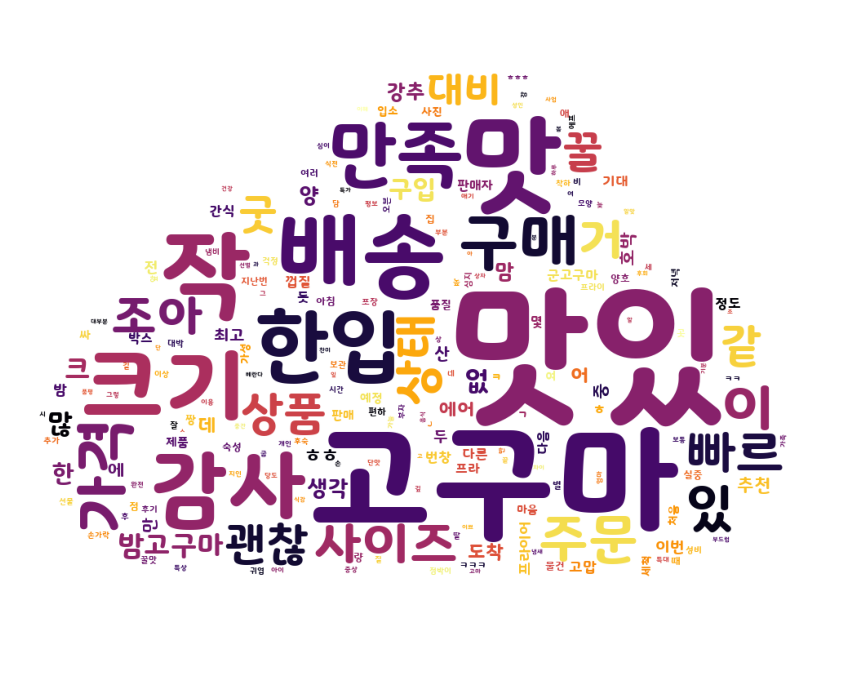

In [113]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

alice_coloring = np.array(Image.open('/content/a.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(font_path = '/content/Binggrae_0.ttf', background_color='white',colormap = "inferno",mask=alice_coloring,width=1500, height=1000)
wc.generate_from_frequencies(good_word)



plt.imshow(wc)
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.axis('off') 

plt.show()

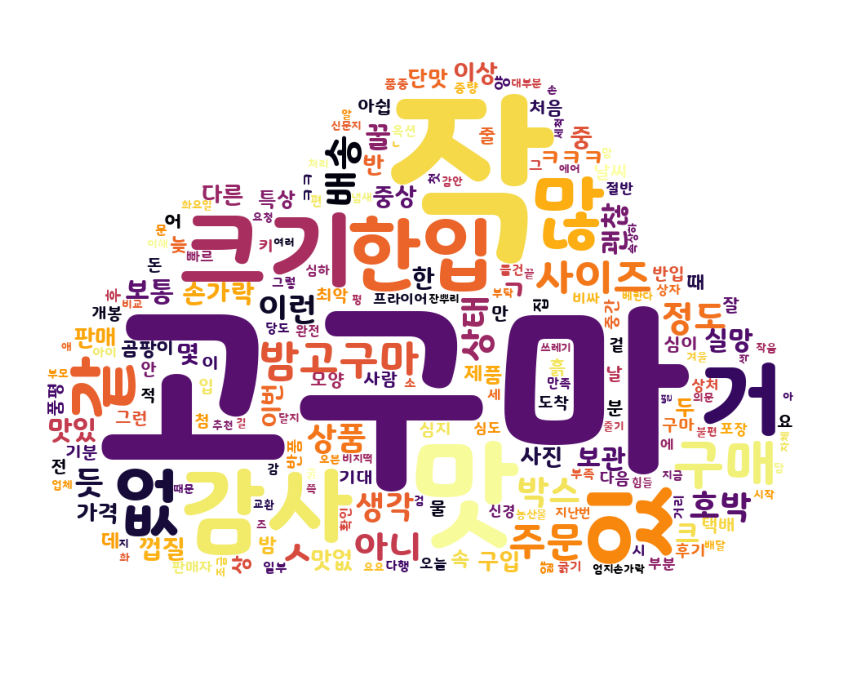

In [112]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

alice_coloring = np.array(Image.open('/content/a.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(font_path = '/content/Binggrae_0.ttf', background_color='white',colormap = "inferno",mask=alice_coloring,width=1500, height=1000)
wc.generate_from_frequencies(bad_word) 



plt.imshow(wc)
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.axis('off') 

plt.show()